In [1]:
%matplotlib inline
import os
import yaml
import random
import model
import numpy as np
from glob import glob
from easydict import EasyDict
from PIL import Image, ImageOps
from torch import optim

import utils
from dataset import StegaData
from dataset import train_test_dataset
import torch
from torch.utils.data import DataLoader, TensorDataset
import lpips
import argparse
from kornia import color
from torch.nn import functional as F
import matplotlib.pyplot as plt
from utils_manupulator import FGSM_DEC, PGD_DEC, Traditional_Img_Manupulator
import torchvision
from evaluate import evaluate
import matplotlib.pyplot as plt 
import torchvision
os.environ['CUDA_VISIBLE_DEVICES'] = "1" 

with open('setting.yaml', 'r') as f:
    args = EasyDict(yaml.load(f, Loader=yaml.SafeLoader))
dataset = StegaData(args.train_path, args.secret_size, size=(400, 400))
datasets = train_test_dataset(dataset, test_split=0.1)
train_dataset = datasets['train']
test_dataset = datasets['test']

step = int(150000) # define the checkpoint need to load
run_name = 'test3'
encoder_path = "results/{}/saved_models/encoder_{}.pth".format(run_name, step)
detector_path = "results/{}/saved_models/detector_{}.pth".format(run_name, step)
encoder = torch.load(encoder_path)
detector = torch.load(detector_path)
args.run_name = 'test3'
args.batch_size = 64

test_loader = DataLoader(test_dataset, batch_size=64, num_workers=8, shuffle=False, pin_memory=True, drop_last=True)
evaluate(encoder, detector, test_loader, args)

KeyError: "['epsilon'] not in index"

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

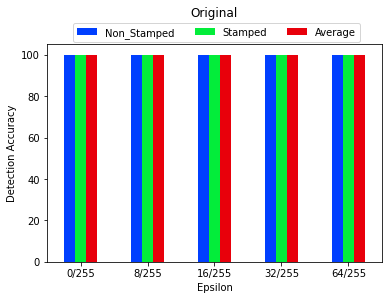

<Figure size 432x288 with 0 Axes>

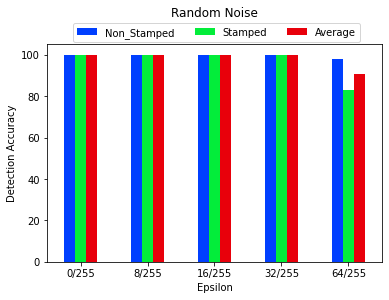

<Figure size 432x288 with 0 Axes>

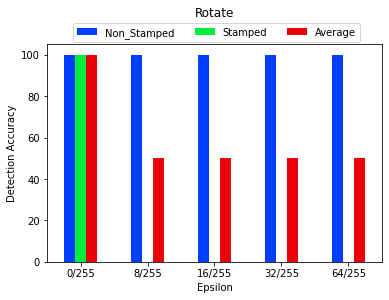

<Figure size 432x288 with 0 Axes>

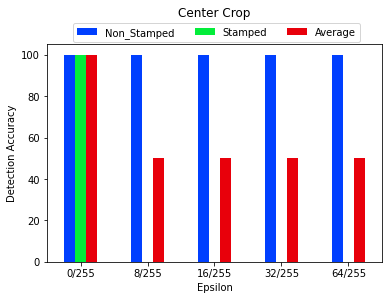

<Figure size 432x288 with 0 Axes>

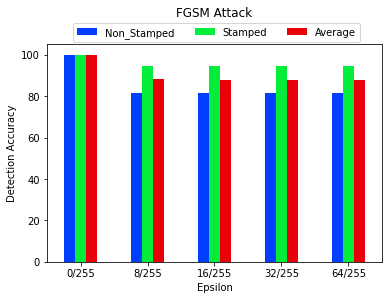

<Figure size 432x288 with 0 Axes>

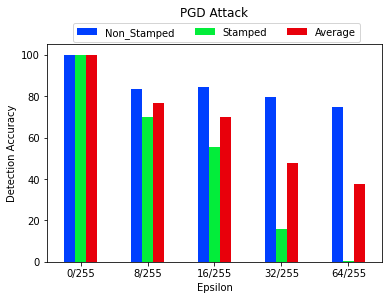

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
run_name = 'test3'
file_path = "./results/{}/evaluations/res.csv".format(run_name)
df = pd.read_csv(file_path)

import os
fig_path = "./results/{}/evaluations/figures".format(run_name)
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig_names = ['Original', 'Random Noise', 'Rotate', 'Center Crop', 'FGSM Attack','PGD Attack']
header = ['ori_nonstamp_acc','ori_stamp_acc','ori_acc','rd_nonstamp_acc','rd_stamp_acc', 'rd_acc', 'rotate_nostp_acc', 'rotate_stp_acc','rotate_acc','center_crop_nostp_acc','center_crop_stp_acc','center_crop_acc', 'fgsm_nonstamp_acc', 
    'fgsm_stamp_acc', 'fgsm_acc','pgd_nonstamp_acc', 'pgd_stamp_acc', 'pgd_acc', 'total_num']
for i in range(len(fig_names)):
    fig_name = fig_names[i]
    plt.style.use('seaborn-bright')
    plt.figure()
    df.plot(x="epsilon", y=[header[i*3], header[i*3+1], header[i*3+2]], kind="bar", legend=False)
    plt.ylabel('Detection Accuracy')
    plt.xlabel('Epsilon')
    plt.title(fig_names[i], x=0.5, y=1.1)
    plt.xticks([0,1,2,3,4],['{}/255'.format(x) for x in df['epsilon'].values.tolist()], rotation = 0) 
    plt.legend(['Non_Stamped', 'Stamped','Average'], ncol=3, bbox_to_anchor=(0.45, 0.62,0.5, 0.5))
    plt.savefig('{}/{}.png'.format(fig_path, fig_name),bbox_inches='tight', dpi=500)


In [1]:
%matplotlib inline
import os
import yaml
import random
import model
import numpy as np
from glob import glob
from easydict import EasyDict
from PIL import Image, ImageOps
from torch import optim

import utils
from dataset import StegaData
from dataset import train_test_dataset
import torch
from torch.utils.data import DataLoader, TensorDataset
import lpips
import argparse
from kornia import color
from torch.nn import functional as F
import matplotlib.pyplot as plt
from utils_manupulator import FGSM_DEC, PGD_DEC, Traditional_Img_Manupulator
import torchvision
from evaluate import evaluate
import matplotlib.pyplot as plt 
import torchvision
import numpy as np
os.environ['CUDA_VISIBLE_DEVICES'] = "1" 

with open('setting.yaml', 'r') as f:
    args = EasyDict(yaml.load(f, Loader=yaml.SafeLoader))
dataset = StegaData(args.train_path, args.secret_size, size=(400, 400))
datasets = train_test_dataset(dataset, test_split=0.1)
train_dataset = datasets['train']
test_dataset = datasets['test']

step = int(150000) # define the checkpoint need to load
args.run_name = 'test3'
args.batch_size = 64

In [16]:
import torchvision.transforms.functional as TF
test_loader = DataLoader(test_dataset, batch_size=2, num_workers=8, shuffle=False, pin_memory=True, drop_last=True)
for batch_idx, (image_input, secret_input) in enumerate(test_loader, 0):
    IM = Traditional_Img_Manupulator(image_input)
    adv_image = torch.empty_like(image_input)
    print(adv_image.size(), image_input.size())
    to_pil = torchvision.transforms.ToPILImage()
    to_tensor = torchvision.transforms.ToTensor()
    resizer = torchvision.transforms.Resize((adv_image.size()[-2], adv_image.size()[-1]))
    degrees = [-20,20]
    for i in range(image_input.size()[0]):
        image = to_pil(image_input[i].clone().detach())
        angle = np.random.uniform(degrees[0], degrees[1])
        perturbed_image = TF.rotate(image, angle, fill=255, resample=2, expand=False)
#         perturbed_image = TF.rotate(image, angle,interpolation= TF.InterpolationMode.NEAREST, resample=False, expand=False)

        perturbed_image = resizer(perturbed_image)
        plt.figure()
        plt.axis('off')
        plt.imshow(image)
        plt.savefig('original.pdf',bbox_inches='tight')
        plt.close()
        
        plt.figure()
        plt.axis('off')
        plt.imshow(perturbed_image)
        plt.savefig('perturbed.pdf',bbox_inches='tight')
        plt.close()
        perturbed_image = to_tensor(perturbed_image)
        adv_image[i,:,:,:] = perturbed_image
        break
    break


torch.Size([2, 3, 400, 400]) torch.Size([2, 3, 400, 400])


In [2]:
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
test_loader = DataLoader(test_dataset, batch_size=2, num_workers=8, shuffle=False, pin_memory=True, drop_last=True)
to_pil = torchvision.transforms.ToPILImage()
for batch_idx, (image_input, secret_input) in enumerate(test_loader, 0):
    image = image_input.cpu()
    adv_image = torch.empty_like(image)
    transform = transforms.Compose([transforms.ToPILImage(), transforms.CenterCrop(220),transforms.Resize((adv_image.size()[-2], adv_image.size()[-1])), transforms.ToTensor()])
    for i in range(image_input.size()[0]):
        print(image_input, image)
        perturbed_image = transform(image_input[i])
        adv_image[i,:,:,:] = perturbed_image
        ori_image = to_pil(image_input[i].cpu())
        perturbed_image = to_pil(perturbed_image)
        plt.figure()
        plt.axis('off')
        plt.imshow(ori_image)
        plt.savefig('original.pdf',bbox_inches='tight')
        plt.close()
        
        plt.figure()
        plt.axis('off')
        plt.imshow(perturbed_image)
        plt.savefig('perturbed.pdf',bbox_inches='tight')
        plt.close()
        break
    break

tensor([[[[0.3725, 0.6980, 1.0000,  ..., 0.8078, 0.9098, 0.7176],
          [0.3255, 0.2863, 0.5137,  ..., 0.4745, 0.7882, 0.9412],
          [0.5882, 0.3529, 0.2549,  ..., 0.6510, 0.5647, 0.3765],
          ...,
          [0.7647, 0.7294, 0.7020,  ..., 0.4941, 0.6196, 0.6235],
          [0.7451, 0.7412, 0.6510,  ..., 0.5804, 0.6824, 0.5843],
          [0.5843, 0.5412, 0.5804,  ..., 0.5686, 0.6039, 0.5765]],

         [[0.2784, 0.5843, 0.8902,  ..., 0.7843, 0.8314, 0.6118],
          [0.2275, 0.1961, 0.4353,  ..., 0.4314, 0.6941, 0.8039],
          [0.4863, 0.2431, 0.1333,  ..., 0.5373, 0.4510, 0.3137],
          ...,
          [0.6471, 0.5922, 0.5843,  ..., 0.3804, 0.4980, 0.5020],
          [0.6392, 0.6157, 0.5373,  ..., 0.4627, 0.5569, 0.4627],
          [0.4863, 0.4275, 0.4706,  ..., 0.4510, 0.4784, 0.4549]],

         [[0.1333, 0.4118, 0.6549,  ..., 0.5569, 0.5725, 0.4275],
          [0.0510, 0.0392, 0.2863,  ..., 0.2392, 0.4706, 0.5647],
          [0.2745, 0.0706, 0.0078,  ..., 0